In [1]:
import numpy as np
from data1 import data,x,y,z
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from pyowl import OwlRegressor
from mpl_toolkits.mplot3d import Axes3D
from laplace import get_laplace, knn_laplace,extend_knn,cordinate, distance
from kMeans import kMeans, min_k_index, max_k_index
import copy

In [2]:
def ramp_weight(alpha,beta,r,n):
    w=np.zeros(n)
    for i in range(r):
        w[i]=(r-i+1)*beta
    w=w+alpha
    return w

In [3]:
def local_store(B,coef,index):
    for item in coef:
        B[item,index]=coef[item]
    return B

In [4]:
def k_neighbor(point,data,k):
    n=len(data)
    dist=[]
    for i in range(n):
        dist.append(distance(point,data[i]))
    index=sorted(range(len(dist)), key=lambda k: dist[k])[1:(k+1)]
    return index

In [5]:
def local_owl(data,indexs,B,alpha,beta,k):
    n_sample=len(data[0])
    for index in indexs:
        kIndex=k_neighbor(data[index],data,k)
        X=np.zeros((n_sample,k))
        for i in range(k):
            X[:,i]=data[kIndex[i]]
        Y=np.array(data[index])
        owl=Lasso(alpha,max_iter=10000)
        owl.fit(X,Y)
        coef={}
        for i in range(k):
            B[kIndex[i],index]=owl.coef_[i]
    return B

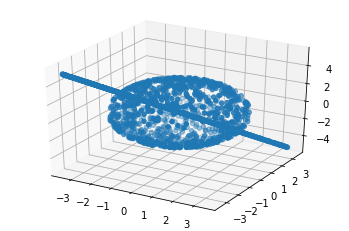

In [6]:
ax=plt.subplot(111,projection='3d')
ax.scatter(x,y,z)

In [7]:
n_sample=len(data[0])
n_feature=len(data)

In [8]:
alpha=0.000001
beta=0.001
r=1000
K=500
k=100

In [9]:
indexs=np.random.choice(range(n_feature),K)
B=np.zeros((n_feature,n_feature))

In [10]:
B=local_owl(data,indexs,B,alpha,beta,k)
B=np.abs(B)
#B=B+B.T

In [11]:
L=get_laplace(B)

In [12]:
u,v=np.linalg.eig(L)
v=np.real(v)
u=np.real(u)

In [13]:
u[min_k_index(u,2)]

5.714867505047218e-13

In [14]:
sorted(abs(u))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.714867505047218e-13,
 1.7836474689945407e-11,
 4.7345859006467464e-11,
 5.5367580956964576e-11,
 5.834846714132701e-11,
 8.91152483778198e-11,
 1.258867972039487e-10,
 1.407181317686623e-10,
 1.457015632947198e-10,
 1.5727543141849536e-10,
 1.5774403045295987e-10,
 1.729305713489301e-10,
 2.1107005566245686e-10,
 2.3538355170820123e-10,
 2.4419989353844743e-10,
 2.7084765560122237e-10,
 2.750352167837297e-10,
 2.843080895748758e-10,
 2.853563599103906e-10,
 3.0837229747647094e-10,
 3.149874857392968e-10,
 3.394197968979362e-10,
 3.42820967918016e-10,
 3.548502363746525e-10,
 3.9489582886654624e-10,
 4.051368892991491e-10,
 4.1621988039317427e-10,
 4.354953644016792e-10,
 4.4240263421267584e-10,
 4.531485088301706e-10,
 5.273664258069156e-10,
 5.366040750430578e-10,

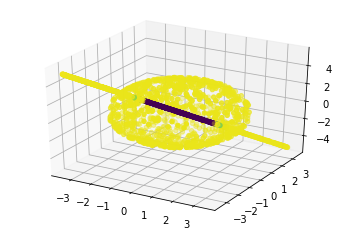

In [15]:
ax = plt.subplot(111, projection='3d')
ax.scatter(x,y,z,c=v[:,min_k_index(u,2)])

In [16]:
nonzero=[]
for index in range(1000,2000):
    nonzero.append(np.count_nonzero(B[:,index]))
nonzero_idx=[]
for i in range(1000):
    if nonzero[i]!=0:
        nonzero_idx.append(i+1000)

In [17]:
index=nonzero_idx[129]
print(index)
print(nonzero[index-1000])
if nonzero[index-1000]<7:
    n=nonzero[index-1000]
else:
    n=7
idx=[]
for i in range(1,n+1):
    idx.append(max_k_index(B[:,index],i))
print(idx)

1551
43
[1775, 1678, 1404, 1353, 1075, 1555, 1246]


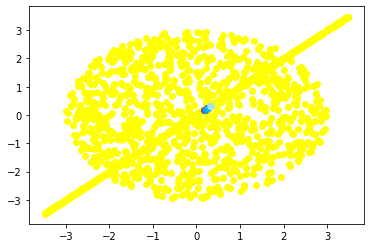

In [18]:
colour=['midnightblue','blue','mediumslateblue','dodgerblue','deepskyblue','lightskyblue','powderblue']
ax=plt.subplot(111)
ax.scatter(x,y,color='yellow')
ax.scatter(x[index],y[index],color='red')
for i in range(n):
    ax.scatter(x[idx[i]],y[idx[i]],color=colour[i])

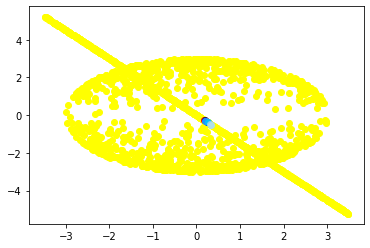

In [19]:
colour=['midnightblue','blue','mediumslateblue','dodgerblue','deepskyblue','lightskyblue','powderblue']
ax=plt.subplot(111)
ax.scatter(x,z,color='yellow')
ax.scatter(x[index],z[index],color='red')
for i in range(n):
    ax.scatter(x[idx[i]],z[idx[i]],color=colour[i])

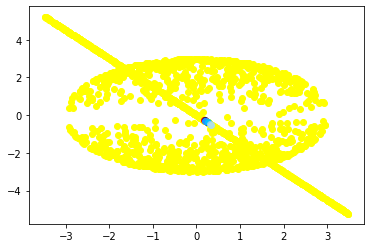

In [20]:
colour=['midnightblue','blue','mediumslateblue','dodgerblue','deepskyblue','lightskyblue','powderblue']
ax=plt.subplot(111)
ax.scatter(y,z,color='yellow')
ax.scatter(y[index],z[index],color='red')
for i in range(n):
    ax.scatter(y[idx[i]],z[idx[i]],color=colour[i])

In [21]:
mdat1=np.zeros((2000,3))
mdat1[:,0]=v[:,min_k_index(u,2)]
mdat1[:,1]=v[:,min_k_index(u,3)]
mdat1[:,2]=v[:,min_k_index(u,4)]

In [22]:
pre_idx1=kMeans(mdat1,4)[:,0]

In [23]:
x_1=[]
y_1=[]
z_1=[]
x_2=[]
y_2=[]
z_2=[]
x_3=[]
y_3=[]
z_3=[]
x_4=[]
y_4=[]
z_4=[]
data_1=[]
data_2=[]
data_3=[]
data_4=[]
for i in range(len(pre_idx1)):
    if pre_idx1[i]==0:
        x_1.append(x[i])
        y_1.append(y[i])
        z_1.append(z[i])
        data_1.append(data[i])
    elif pre_idx1[i]==2:
        x_3.append(x[i])
        y_3.append(y[i])
        z_3.append(z[i])
        data_3.append(data[i])
    elif pre_idx1[i]==3:
        x_4.append(x[i])
        y_4.append(y[i])
        z_4.append(z[i])
        data_4.append(data[i])
    else:
        x_2.append(x[i])
        y_2.append(y[i])
        z_2.append(z[i])
        data_2.append(data[i])

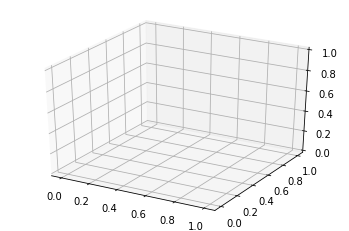

In [73]:
ax=plt.subplot(111, projection='3d')
ax.scatter(x_1,y_1,z_1)

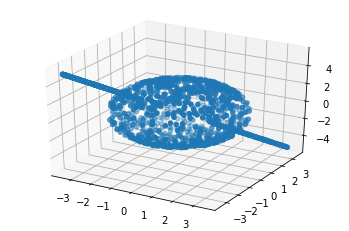

In [25]:
ax=plt.subplot(111, projection='3d')
ax.scatter(x_1,y_1,z_1)